In [10]:
import os
import re
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [5]:
results_dict



{'EleutherAI_pythia-1.4b_step1000_EleutherAI_pythia-1.4b_step1000_.results_summary': {'weak_acc': 0.635,
  'strong_acc': 0.635,
  'transfer_acc_xent': 0.635,
  'transfer_acc_logconf': 0.56},
 'EleutherAI_pythia-1.4b_step1000_EleutherAI_pythia-1.4b_step121000_.results_summary': {'weak_acc': 0.635,
  'strong_acc': 0.635,
  'transfer_acc_xent': 0.635,
  'transfer_acc_logconf': 0.575},
 'EleutherAI_pythia-1.4b_step1000_EleutherAI_pythia-1.4b_step31000_.results_summary': {'weak_acc': 0.635,
  'strong_acc': 0.605,
  'transfer_acc_xent': 0.635,
  'transfer_acc_logconf': 0.545},
 'EleutherAI_pythia-1.4b_step1000_EleutherAI_pythia-1.4b_step61000_.results_summary': {'weak_acc': 0.635,
  'strong_acc': 0.635,
  'transfer_acc_xent': 0.635,
  'transfer_acc_logconf': 0.495},
 'EleutherAI_pythia-1.4b_step1000_EleutherAI_pythia-1.4b_step91000_.results_summary': {'weak_acc': 0.635,
  'strong_acc': 0.57,
  'transfer_acc_xent': 0.635,
  'transfer_acc_logconf': 0.455},
 'EleutherAI_pythia-1.4b_step1000_Ele

In [7]:
result_file.split("EleutherAI_pythia-")

['', '410m_step91000_', '410m_step91000_.results_summary.json']

In [ ]:
"EleutherAI_pythia-{param}_step{step_size}_EleutherAI_pythia-{param}_step{step_size}_"

In [33]:
def merge_dicts(*dicts):
    merged_dict = {}
    for d in dicts:
        merged_dict.update(d)
    return merged_dict

def extract_variables(string):
    pattern = r'EleutherAI_pythia-(.*?)_step(\d+)_'
    matches = re.findall(pattern, string)    
    variables = {
        "weak_params": matches[0][0],
        "weak_step_size": matches[0][1],
        "strong_params": matches[1][0],
        "strong_step_size": matches[1][1]

    }

    return variables


results = []

for result_file in sorted(os.listdir("results/")):
    _ = merge_dicts(json.loads(open("results/"+result_file,"r").read()), extract_variables(result_file))
    results.append(_)

In [34]:
results = pd.DataFrame(results)

In [35]:
results.head()

,weak_acc,strong_acc,transfer_acc_xent,transfer_acc_logconf,weak_params,weak_step_size,strong_params,strong_step_size
0,0.635,0.635,0.635,0.560,1.4b,1000,1.4b,1000
1,0.635,0.635,0.635,0.575,1.4b,1000,1.4b,121000
2,0.635,0.605,0.635,0.545,1.4b,1000,1.4b,31000
3,0.635,0.635,0.635,0.495,1.4b,1000,1.4b,61000
4,0.635,0.570,0.635,0.455,1.4b,1000,1.4b,91000


In [36]:
param_dict = {
    "1.4b": 1.4,
    "160m": 0.16,
    "1b": 1.0,
    "2.8b": 2.8,
    "410m": 0.41
}

In [37]:
results["weak_params"] = results["weak_params"].replace(param_dict)
results["strong_params"] = results["strong_params"].replace(param_dict)

/tmp/ipykernel_37733/2090377381.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  results["weak_params"] = results["weak_params"].replace(param_dict)
/tmp/ipykernel_37733/2090377381.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  results["strong_params"] = results["strong_params"].replace(param_dict)


In [38]:
results["weak_params"]

0      1.40
1      1.40
2      1.40
3      1.40
4      1.40
       ... 
619    0.41
620    0.41
621    0.41
622    0.41
623    0.41
Name: weak_params, Length: 624, dtype: float64

In [39]:
results.to_csv("w2s_results.csv")

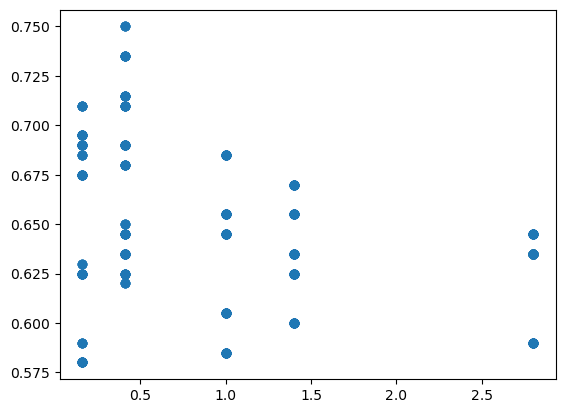

In [46]:
plt.scatter(results["weak_params"],results["weak_acc"])

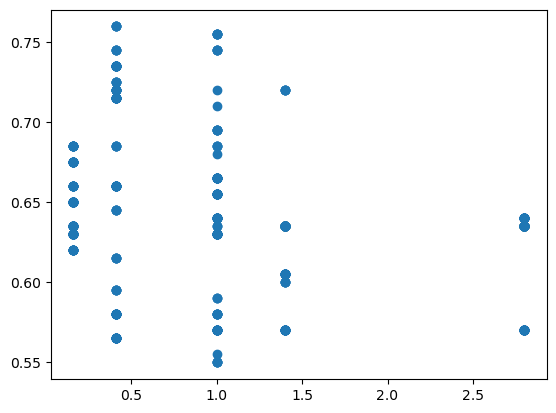

In [48]:
plt.scatter(results["strong_params"],results["strong_acc"])

In [50]:
results

,weak_acc,strong_acc,transfer_acc_xent,transfer_acc_logconf,weak_params,weak_step_size,strong_params,strong_step_size
0,0.635,0.635,0.635,0.560,1.40,1000,1.40,1000
1,0.635,0.635,0.635,0.575,1.40,1000,1.40,121000
2,0.635,0.605,0.635,0.545,1.40,1000,1.40,31000
3,0.635,0.635,0.635,0.495,1.40,1000,1.40,61000
4,0.635,0.570,0.635,0.455,1.40,1000,1.40,91000
...,...,...,...,...,...,...,...,...
619,0.735,0.595,0.635,0.545,0.41,91000,0.41,1000
620,0.735,0.685,0.700,0.665,0.41,91000,0.41,121000
621,0.735,0.725,0.715,0.670,0.41,91000,0.41,31000
622,0.735,0.720,0.705,0.710,0.41,91000,0.41,61000


In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = results

# Define the MLP model
class MLPRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Prepare data
X = data[['weak_acc', 'strong_acc', 'weak_params', 'weak_step_size', 'strong_params', 'strong_step_size']]
y = data[['transfer_acc_xent', 'transfer_acc_logconf']]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Define hyperparameters
input_size = X.shape[1]
hidden_size = 64
output_size = y.shape[1]
learning_rate = 0.001
num_epochs = 1000

# Instantiate the model
model = MLPRegressor(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    model.eval()
    predicted = model(X_test_tensor)
    test_loss = criterion(predicted, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

ModuleNotFoundError: No module named 'torch'